In [1]:
!pip install torch torchvision matplotlib numpy

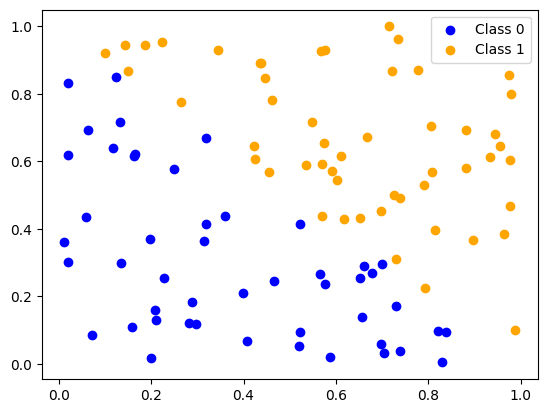

Epoch [100/1000], Loss: 0.5710
Epoch [200/1000], Loss: 0.5230
Epoch [300/1000], Loss: 0.4844
Epoch [400/1000], Loss: 0.4530
Epoch [500/1000], Loss: 0.4269
Epoch [600/1000], Loss: 0.4049
Epoch [700/1000], Loss: 0.3862
Epoch [800/1000], Loss: 0.3700
Epoch [900/1000], Loss: 0.3559
Epoch [1000/1000], Loss: 0.3434


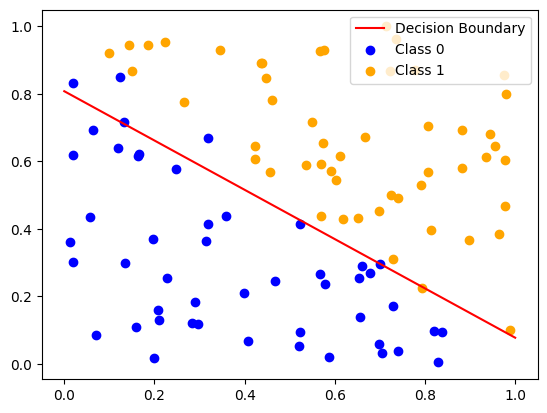

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
torch.manual_seed(0)
N = 100
X = np.random.rand(N, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", color="blue")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", color="orange")
plt.legend()
plt.show()

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

model = SimpleNN()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

x1 = np.linspace(0, 1, 100)
x2 = -(model.fc1.weight[0][0].item() * x1 + model.fc1.bias.item()) / model.fc1.weight[0][1].item()
plt.plot(x1, x2, label="Decision Boundary", color="red")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", color="blue")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", color="orange")
plt.legend()
plt.show()


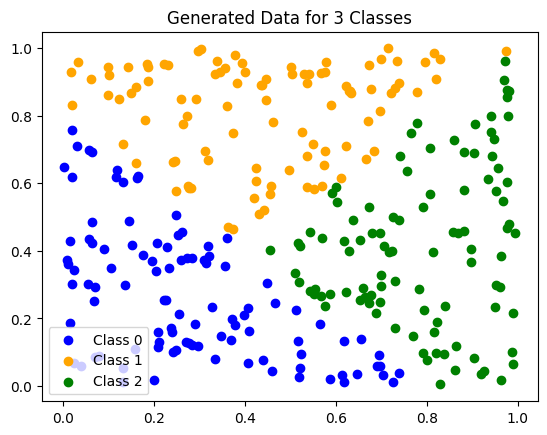

Epoch [100/1000], Loss: 0.3625
Epoch [200/1000], Loss: 0.2039
Epoch [300/1000], Loss: 0.1533
Epoch [400/1000], Loss: 0.1174
Epoch [500/1000], Loss: 0.0895
Epoch [600/1000], Loss: 0.0701
Epoch [700/1000], Loss: 0.0574
Epoch [800/1000], Loss: 0.0492
Epoch [900/1000], Loss: 0.0435
Epoch [1000/1000], Loss: 0.0385


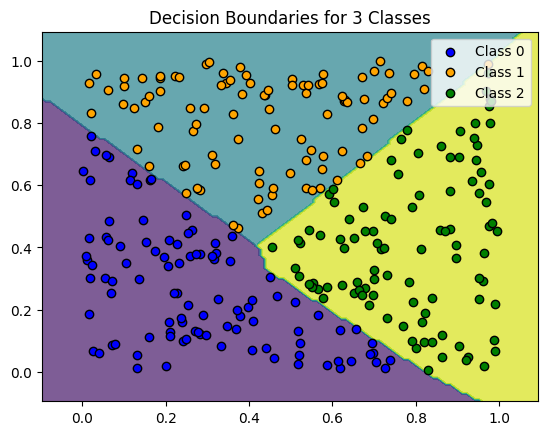

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
torch.manual_seed(0)
N = 300
X = np.random.rand(N, 2)


y = np.zeros(N)
y[X[:, 0] + X[:, 1] < 0.8] = 0
y[(X[:, 0] + X[:, 1] >= 0.8) & (X[:, 0] - X[:, 1] < 0)] = 1
y[(X[:, 0] + X[:, 1] >= 0.8) & (X[:, 0] - X[:, 1] >= 0)] = 2

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", color="blue")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", color="orange")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label="Class 2", color="green")
plt.legend()
plt.title("Generated Data for 3 Classes")
plt.show()


class MultiClassNN(nn.Module):
    def __init__(self):
        super(MultiClassNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MultiClassNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


with torch.no_grad():
    predictions = torch.argmax(model(X_tensor), dim=1).numpy()


x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)


with torch.no_grad():
    grid_predictions = torch.argmax(model(grid_points), dim=1).numpy()
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.7, cmap='viridis')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", color="blue", edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", color="orange", edgecolor='k')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label="Class 2", color="green", edgecolor='k')
plt.legend()
plt.title("Decision Boundaries for 3 Classes")
plt.show()